    DIP Practical 3
    i) Digital Negetive
        S = (l-1) - r
    ii)Log Transformation
        
    iii)Gamma-factor Transformation
    iv)Bit Plane slicing
    v) Grey-level slicing

### i) Digital Negetive

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

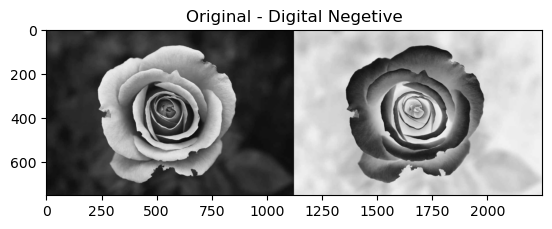

In [39]:
image = cv2.imread("grey2.jpg")[:,:,::-1]
DigNeg = 255 - image

# plt.imshow(image)
# plt.title("Original Image")
# plt.show()

# plt.imshow(DigNeg)
# plt.title("Digital Negetive Image")
# plt.show()

combined = np.hstack((image,DigNeg))
plt.imshow(combined)
plt.title("Original - Digital Negetive")
plt.show()

# toDigNeg = lambda x: 255-x
#or DigNeg = toDigNeg(image)

### ii) Log Transformation

C:\Users\cse\AppData\Local\Temp\ipykernel_12484\3647696756.py:4: RuntimeWarning: divide by zero encountered in log
  log_image = c*(np.log(image+1))
C:\Users\cse\AppData\Local\Temp\ipykernel_12484\3647696756.py:5: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image,dtype = np.uint8)


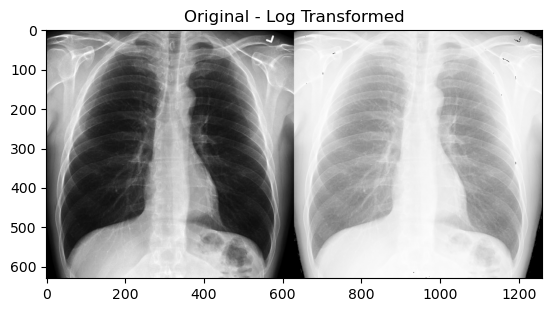

In [40]:
image = cv2.imread("chest.jpg")[:,:,::-1]

c = 255 / np.log(1+np.max(image))
log_image = c*(np.log(image+1))
log_image = np.array(log_image,dtype = np.uint8)

# plt.imshow(image)
# plt.title("Original Image")
# plt.show()

# plt.imshow(log_image)
# plt.title("Log Transformed Image")
# plt.show()

combined = np.hstack((image,log_image))
plt.imshow(combined)
plt.title("Original - Log Transformed")
plt.show()

In [41]:
### iii) Gamma-factor Transformation

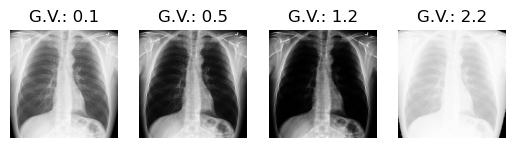

In [42]:
image = cv2.imread("chest.jpg")[:,:,::-1]

f, axarr = plt.subplots(nrows=1,ncols=4)

for i,gamma in enumerate([0.1,0.5,1.2,2.2]):
    gamma_corrected = np.array(255*(image/255)**gamma,dtype=np.uint8)
    plt.axis('off')
    plt.imshow(gamma_corrected)
    plt.sca(axarr[i])
    plt.title(f'G.V.: {gamma}')
plt.show()

# cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg',gamma_corrected)

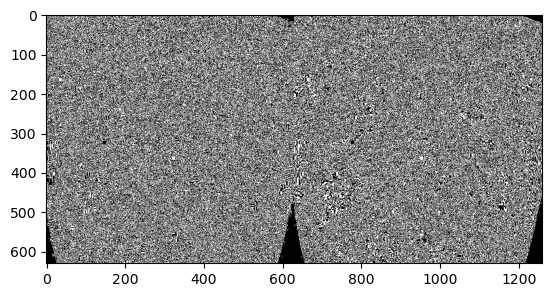

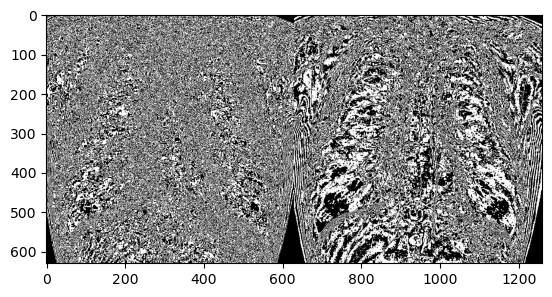

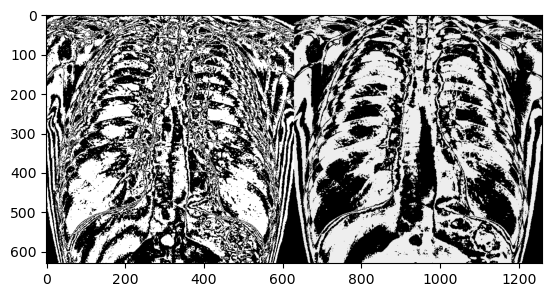

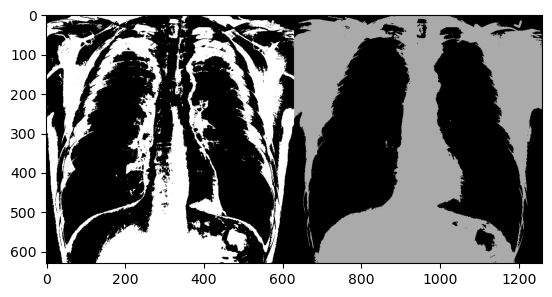

In [43]:
### iv) Bit Plane Slicing

image = cv2.imread("chest.jpg",0)

out = []

for k in range(0, 8):
    # create an image for each k bit plane
    plane = np.full((image.shape[0], image.shape[1]), 2 ** k, np.uint8)
    # execute bitwise and operation
    res = np.bitwise_and(plane, image)
    # multiply ones (bit plane sliced) with 255 just for better visualization
    x = res * 255
    # append to the output list
    out.append(x)
    
plt.imshow(np.hstack(out[:2]),cmap="gray")
plt.show()
plt.imshow(np.hstack(out[2:4]),cmap="gray")
plt.show()
plt.imshow(np.hstack(out[4:6]),cmap="gray")
plt.show()
plt.imshow(np.hstack(out[6:8]),cmap="gray")
plt.show()

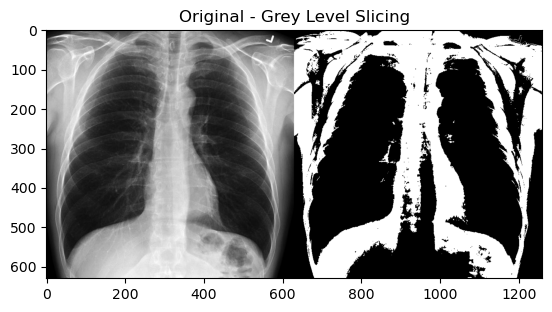

In [44]:
### v) Gray Level Slicing

image = cv2.imread("chest.jpg",0)

lt = 100
ht = 200
gls = np.copy(image)
gls[(image>=lt) & (image<=ht)] = 255
gls[(image<lt) | (image>ht)] = 0
plt.imshow(np.hstack((image,gls)),cmap="gray")
plt.title("Original - Grey Level Slicing")
plt.show()